# Important Definitions

### Players

    Player 1
    Player 2

### Colors

    red = 0
    green = 1 
    yellow = 2 
    blue = 3
    purple = 4 
    black = 5

# Running Tests

In [1]:
from MCTS import MCTS
from Board import Board
import numpy as np
from time import time
from multiprocessing import Process

In [2]:
def test_AI_helper(size, AI_move_first, num_iterations, exploration_parameter, 
            intelligence_parameter, dumb_move_depth):
    # Initializing a random board of the given size
    board = Board(size=size)

    # Playing out the game
    while sum(board.get_score()) < size[0]*size[1]:
        if AI_move_first:
            MCTS_ = MCTS(board, 1, exploration_parameter = exploration_parameter, 
                         intelligence_parameter = intelligence_parameter)
            board.update_board(1, MCTS_.select_move(num_iterations = num_iterations))
            board.update_board(2, board.best_move_depth(2, dumb_move_depth))
            print(board.get_score())
        else:
            board.update_board(1, board.best_move_depth(1, dumb_move_depth))
            MCTS_ = MCTS(board, 2, exploration_parameter = exploration_parameter, 
                         intelligence_parameter = intelligence_parameter)
            board.update_board(2, MCTS_.select_move(num_iterations = num_iterations))
            print(board.get_score())
    
    return board.get_score()

In [3]:
def test_AI(AI_mover, num_iters, exploration_parameter, intelligence, dumb_depth):
    print("Called")
    num_games = 100
    scores = np.zeros((2, num_games))

    start_time = time()
    for i in range(num_games):
        print(i)
        score = test_AI_helper((7,8), AI_mover, num_iters, exploration_parameter, intelligence, dumb_depth)
        scores[0, i] = score[0]
        scores[1, i] = score[1]                        
    
    if AI_mover:
        print("-------------------------------------------------------------------------")  
        print(f"With the AI going first, {num_iters} number of iterations," + 
              f" and dumb_move_depth of {dumb_depth}")
        print(f"The total time was {time() - start_time} seconds.")
        
        win_percentage = sum(scores[0, :] > scores[1, :])
        loss_percentage = sum(scores[0, :] < scores[1, :])
        tie_percentage = sum(scores[0, :] == scores[1, :])
        avg_AI_score = np.mean(scores[0,:])
        avg_dumb_score = np.mean(scores[1,:])
        
        print(f"The AI win percentage was {win_percentage}%, the AI loss percentage was {loss_percentage}%" +
          f", and the tie percentage was {tie_percentage}%.")
        print(f"The AI average score was {avg_AI_score} and the dumb average score was {avg_dumb_score}")
    
    else:
        print("-------------------------------------------------------------------------") 
        print(f"With the AI going second, {num_iters} number of iterations," + 
              f" and dumb_move_depth of {dumb_depth}")
        print(f"The total time was {time() - start_time} seconds.")

        win_percentage = sum(scores[1, :] > scores[0, :])
        loss_percentage = sum(scores[1, :] < scores[0, :])
        tie_percentage = sum(scores[1, :] == scores[0, :])
        avg_AI_score = np.mean(scores[1,:])
        avg_dumb_score = np.mean(scores[0,:])
        
        print(f"The AI win percentage was {win_percentage}%, the AI loss percentage was {loss_percentage}%" +
          f", and the tie percentage was {tie_percentage}%.")
        print(f"The AI average score was {avg_AI_score} and the dumb average score was {avg_dumb_score}")

In [ ]:
# Testing a crazy number of Configurations
num_iterations = [50, 100, 500, 1000, 2000]
move_first = [True, False]
Exploration_Paramters = [5]
Intelligence_Parameters = [0.5]
dumb_move_depth = [1, 3]

jobs = []
for num_iters in num_iterations:
    for AI_mover in move_first:
        for exploration_parameter in Exploration_Paramters:
            for intelligence in Intelligence_Parameters:
                for dumb_depth in dumb_move_depth:
                    job = Process(target=test_AI, args=(AI_mover, num_iters, 
                                                             exploration_parameter, intelligence, dumb_depth))
                    jobs.append(job)
                    job.start()
                    
for job in jobs: 
    job.join()

Actually ran this code on a compute cluser with a 32 core CPU

# Actual Game Test

The following simulated game was played against a human player using a real GamePigeon generated game board and played over iMessage

In [2]:
from MCTS import MCTS
from Board import Board
import numpy as np

In [7]:
# Data from an actual iMessage Filler game
data = np.array([[3,2,5,4,5,4,3,2],[2,4,0,3,4,3,0,1],[0,3,5,0,5,4,1,0],[1,4,2,4,0,5,4,1],
                 [2,1,0,1,2,0,5,2],[1,3,2,4,0,2,4,0],[5,2,4,0,3,4,5,1]])

intelligence_parameter = 0.5
exploration_parameter = 1
num_terations = 1000

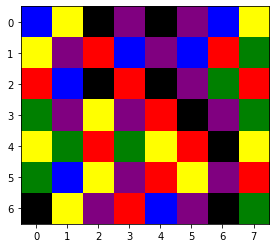

In [8]:
test = Board(data=data)
test.display_board()

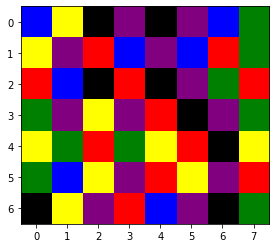

In [9]:
# Updating player 2 first becuase iMessage has the oppenent always
# in the upper right even if they go first
test.update_board(2,1)
test.display_board()

Note: The win percentage and average score in the early game are misleading because the AI is intentially trying a lot of paths that are not good moves. Thus the win percentage and average score for these very bad paths will be very low in the early game but will get better as the game progresses if the AI thinks it's getting a better chance of winning.

red has win percentage 0.2328767123287671 with an average score of 23.89041095890411
yellow has win percentage 0.5383390819846113 with an average score of 28.908994428230283
blue has win percentage 0.2318840579710145 with an average score of 22.999999999999996
purple has win percentage 0.25806451612903225 with an average score of 23.881720430107535
Wall time: 7.83 s


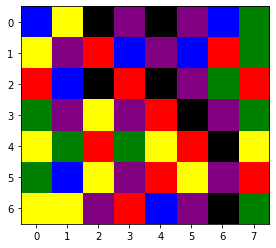

In [11]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

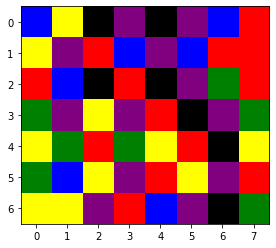

In [12]:
test.update_board(2,0)
test.display_board()

green has win percentage 0.30386740331491713 with an average score of 25.26519337016576
blue has win percentage 0.5862853428664283 with an average score of 29.374715632109208
purple has win percentage 0.38461538461538464 with an average score of 26.57329462989841
black has win percentage 0.19298245614035087 with an average score of 22.684210526315788
Wall time: 7.98 s


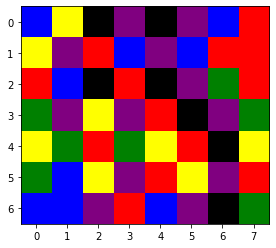

In [13]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

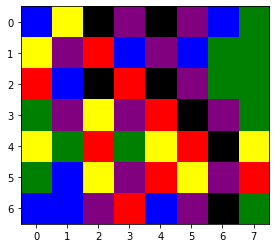

In [14]:
test.update_board(2,1)
test.display_board()

red has win percentage 0.24060150375939848 with an average score of 24.090225563909776
yellow has win percentage 0.6270571827057183 with an average score of 29.849372384937126
purple has win percentage 0.2485207100591716 with an average score of 24.84615384615384
black has win percentage 0.23076923076923078 with an average score of 23.66666666666667
Wall time: 8.18 s


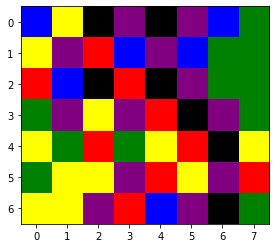

In [15]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

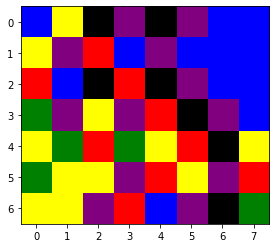

In [16]:
test.update_board(2,3)
test.display_board()

red has win percentage 0.26666666666666666 with an average score of 24.911111111111115
green has win percentage 0.28888888888888886 with an average score of 24.355555555555554
purple has win percentage 0.8225432035078669 with an average score of 32.219241681712695
black has win percentage 0.24324324324324326 with an average score of 22.75675675675676
Wall time: 7.57 s


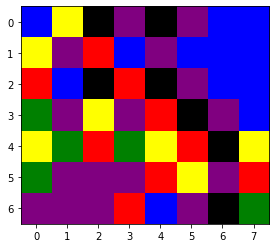

In [17]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

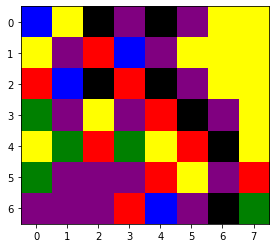

In [19]:
test.update_board(2,2)
test.display_board()

red has win percentage 0.9175443103005394 with an average score of 33.21834061135381
green has win percentage 0.39622641509433965 with an average score of 27.056603773584904
blue has win percentage 0.27586206896551724 with an average score of 24.275862068965516
black has win percentage 0.3103448275862069 with an average score of 23.82758620689655
Wall time: 6.44 s


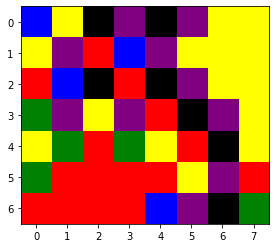

In [21]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

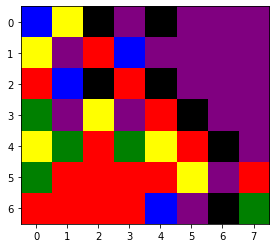

In [22]:
test.update_board(2,4)
test.display_board()

green has win percentage 0.3076923076923077 with an average score of 24.230769230769234
yellow has win percentage 0.9378944710931583 with an average score of 32.47790961878301
blue has win percentage 0.1111111111111111 with an average score of 23.444444444444446
black has win percentage 0.42857142857142855 with an average score of 26.809523809523817
Wall time: 5.05 s


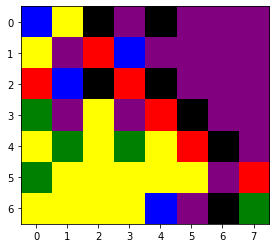

In [24]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

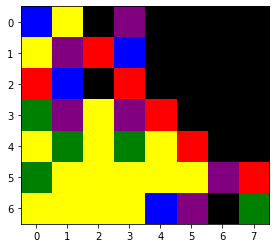

In [25]:
test.update_board(2,5)
test.display_board()

red has win percentage 0.6097560975609756 with an average score of 28.463414634146346
green has win percentage 0.29411764705882354 with an average score of 26.235294117647058
blue has win percentage 0.38095238095238093 with an average score of 26.71428571428572
purple has win percentage 0.9628025477707006 with an average score of 32.15541401273873
Wall time: 3.7 s


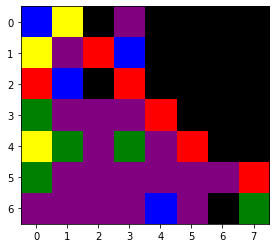

In [29]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

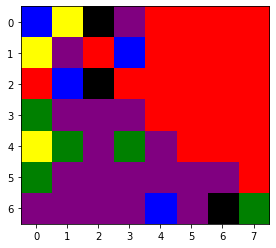

In [30]:
test.update_board(2,0)
test.display_board()

green has win percentage 0.1111111111111111 with an average score of 24.111111111111114
yellow has win percentage 0.23076923076923078 with an average score of 24.615384615384613
blue has win percentage 0.7744360902255639 with an average score of 29.593984962406005
black has win percentage 0.9506365289685632 with an average score of 31.590023382697918
Wall time: 3.82 s


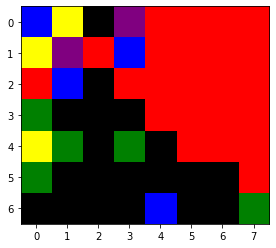

In [33]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

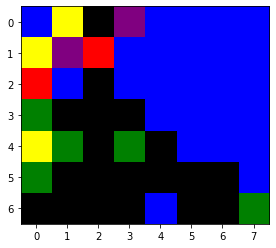

In [34]:
test.update_board(2,3)
test.display_board()

red has win percentage 0.9791507754894483 with an average score of 31.847698957539933
green has win percentage 0.6097560975609756 with an average score of 29.073170731707314
yellow has win percentage 0.0 with an average score of 24.111111111111114
purple has win percentage 0.42857142857142855 with an average score of 27.190476190476186
Wall time: 3.4 s


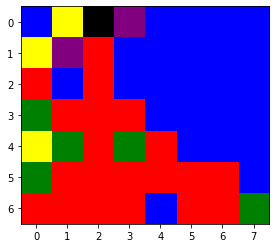

In [35]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

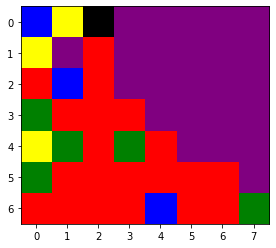

In [36]:
test.update_board(2,4)
test.display_board()

green has win percentage 0.9052631578947369 with an average score of 30.863157894736858
yellow has win percentage 0.9159420289855073 with an average score of 30.956521739130537
blue has win percentage 0.9105431309904153 with an average score of 30.72523961661343
black has win percentage 0.999673309376021 with an average score of 32.259065664817044
Wall time: 3.24 s


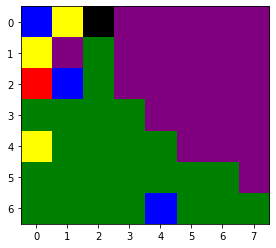

In [37]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

In [47]:
np.std([0.9052631578947369, 0.9159420289855073, 0.9105431309904153, 0.999673309376021])

0.03876165729560391

Notice here that the AI chooses green even though black would clearly be the better choice. It even found that black was a much better choice as seen in the verbose print out. However, we set the AI to choose the simple best greedy move when the win percentage standard deviation is less than 0.05. This is to avoid the situation where the AI is extrememly confident it will win (or lose) and thus there is often no clear best choice since any choice leads to it easily winning. This can lead to the game never ending if the AI never fills in its blocked off territory because it's sure it would win no matter what it does. We set this value of 0.05 for the standard deviation threshold and in this case it looks like the AI could have won by more if it was set lower, allowing it to choose black. However, this is only the case because it was confident it would win no matter what it chose and that was shown by the result of the game. The objective is to win regardless of the score so this does not appear to be an issue here as it clearly knew it was going to win.

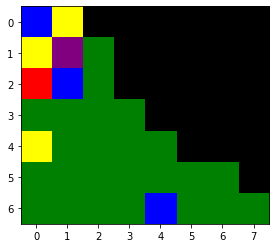

In [38]:
test.update_board(2,5)
test.display_board()

red has win percentage 0.9492455418381345 with an average score of 29.640603566529453
yellow has win percentage 0.910913140311804 with an average score of 29.944320712694825
blue has win percentage 0.6956521739130435 with an average score of 28.913043478260853
purple has win percentage 0.9851287631483496 with an average score of 30.484584693507532
Wall time: 2.05 s


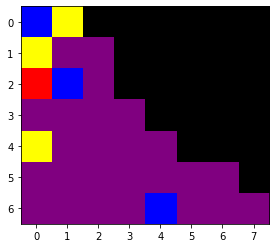

In [39]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

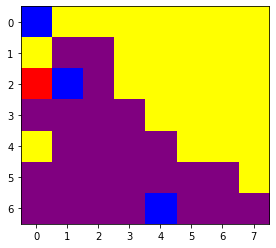

In [40]:
test.update_board(2,2)
test.display_board()

red has win percentage 0.999340804218853 with an average score of 29.51549110085719
green has win percentage 0.9678249678249679 with an average score of 29.57915057915054
blue has win percentage 0.9733629300776915 with an average score of 29.73473917869032
black has win percentage 0.969097651421508 with an average score of 29.645241038318883
Wall time: 2.04 s


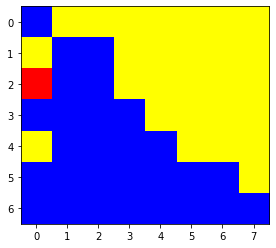

In [41]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

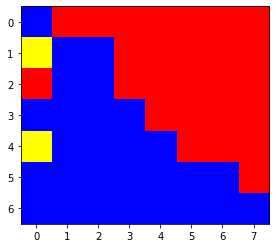

In [42]:
test.update_board(2,0)
test.display_board()

green has win percentage 0.9443298969072165 with an average score of 29.50927835051531
yellow has win percentage 0.9995240361732508 with an average score of 30.257972394098566
purple has win percentage 0.9672578444747613 with an average score of 29.627557980900352
black has win percentage 0.964963503649635 with an average score of 29.54890510948904
Wall time: 1.8 s


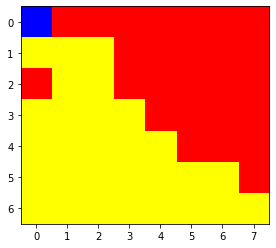

In [43]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

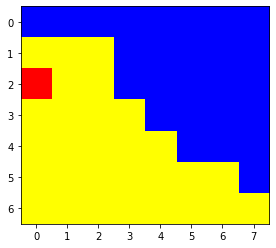

In [44]:
test.update_board(2,3)
test.display_board()

red has win percentage 0.999000999000999 with an average score of 29.9700299700298
green has win percentage 0.999000999000999 with an average score of 29.9700299700298
purple has win percentage 0.999000999000999 with an average score of 29.9700299700298
black has win percentage 0.999000999000999 with an average score of 29.9700299700298
Wall time: 1.62 s


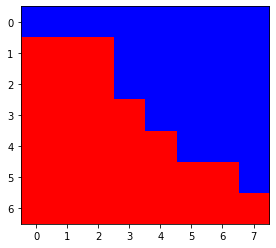

In [45]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

In [46]:
print(f"The final AI score was {test.get_score()[0]} and the final human player scores was {test.get_score()[1]}")

The final AI score was 30 and the final human player scores was 26
